
# Regressão Linear Múltipla

# Importação das Bibliotecas

In [1]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
import statsmodels.api as sm

## Importação e tratamento da base de dados

In [2]:
# Carregar os dados do arquivo Excel
df = pd.read_excel('base_salarios.xlsx')

# Exibir o número de linhas e colunas
print('Número de linhas e colunas:')
print(df.shape)

print('\n-------------------------------------')

# Exibir as primeiras linhas dos dados
print('\nVisualização inicial dos dados:')
print(df.head())

Número de linhas e colunas:
(46, 6)

-------------------------------------

Visualização inicial dos dados:
   Núm. Funcionário  Salario  Anos de Educação Superior  Tempo na Empresa  \
0                29   4139.5                          0                 0   
1                19   4331.1                          0                 6   
2                38   4629.1                          2                 1   
3                26   4645.9                          0                 5   
4                17   4651.2                          2                 0   

   Tempo de Experiencia em outras empresas Inglês  
0                                       11    Não  
1                                        1    Não  
2                                        6    Não  
3                                        4    Não  
4                                        6    Não  


In [3]:
# Drop das colunas desnecessárias
columns_to_drop = ['Núm. Funcionário']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)


# Renomear as colunas conforme especificado
df.rename(columns={
    'Salario': 'Salario',
    'Anos de Educação Superior': 'Anos_Educ_Superior',
    'Tempo na Empresa': 'Tempo_Empresa',
    'Tempo de Experiencia em outras empresas': 'Tempo_Outras_Empresas',
    'Inglês': 'Ingles'
}, inplace=True)

In [4]:
# Amostra de dados da base
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles
39,9316.0,6,25,3,Sim
25,6570.9,4,19,1,Não
26,6788.4,5,21,1,Não
44,11974.4,12,25,4,Sim
35,8086.9,6,14,3,Sim


## Análise Exploratória

### Salários

In [7]:
# Estatísticas dos Salários
df['Salario'].describe()

count       46.000000
mean      6969.797826
std       1924.868873
min       4139.500000
25%       5818.350000
50%       6394.750000
75%       7972.400000
max      12118.100000
Name: Salario, dtype: float64

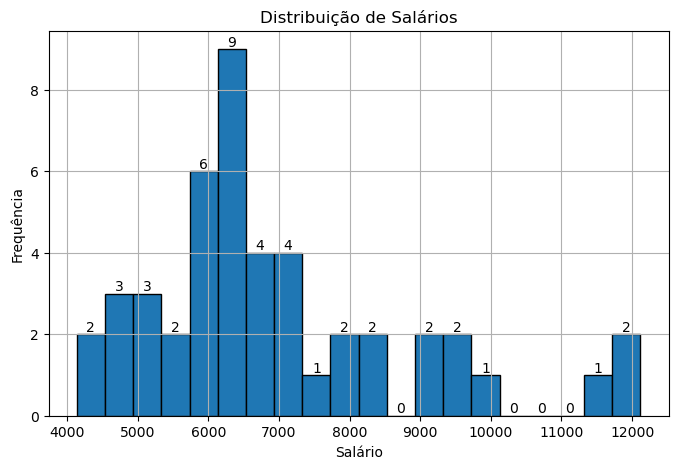

In [5]:
# Histograma da coluna 'Salario'
plt.figure(figsize=(8, 5))
n, bins, patches = plt.hist(df['Salario'], bins=20, edgecolor='black')
plt.title('Distribuição de Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.grid(True)

# Adicionar rótulos de dados
for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2, patches[i].get_height(),
             int(patches[i].get_height()), ha='center', va='bottom')

plt.show()

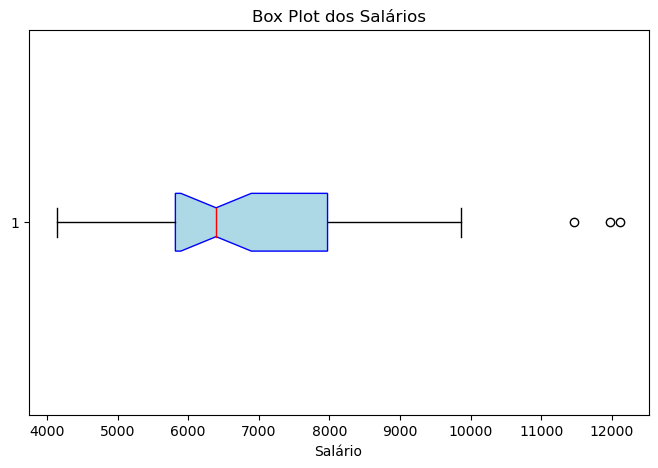

In [54]:
# Criar o box plot da coluna 'Salario'
plt.figure(figsize=(8, 5))
plt.boxplot(df['Salario'], vert=False, patch_artist=True, notch=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'))

# Adicionar título e rótulo ao eixo x
plt.title('Box Plot dos Salários')
plt.xlabel('Salário')

# Exibir o gráfico
plt.show()

### Anos de Educação Superior

In [13]:
# Estatísticas dos Anos de Educação Superior 
df['Anos_Educ_Superior'].describe()

count    46.000000
mean      5.065217
std       2.839422
min       0.000000
25%       4.000000
50%       5.000000
75%       6.000000
max      12.000000
Name: Anos_Educ_Superior, dtype: float64

### Tempo de Empresa

In [14]:
# Estatísticas do tempo de empresa
df['Tempo_Empresa'].describe()

count    46.000000
mean     10.326087
std       7.601328
min       0.000000
25%       5.250000
50%       8.500000
75%      17.250000
max      27.000000
Name: Tempo_Empresa, dtype: float64

### Tempo em Outras Empresas

In [16]:
# Estatísticas do tempo em outras empresas
df['Tempo_Outras_Empresas'].describe()

count    46.000000
mean      4.608696
std       3.726650
min       0.000000
25%       2.250000
50%       4.000000
75%       6.000000
max      19.000000
Name: Tempo_Outras_Empresas, dtype: float64

### Inglês

## Análise Bidimensional

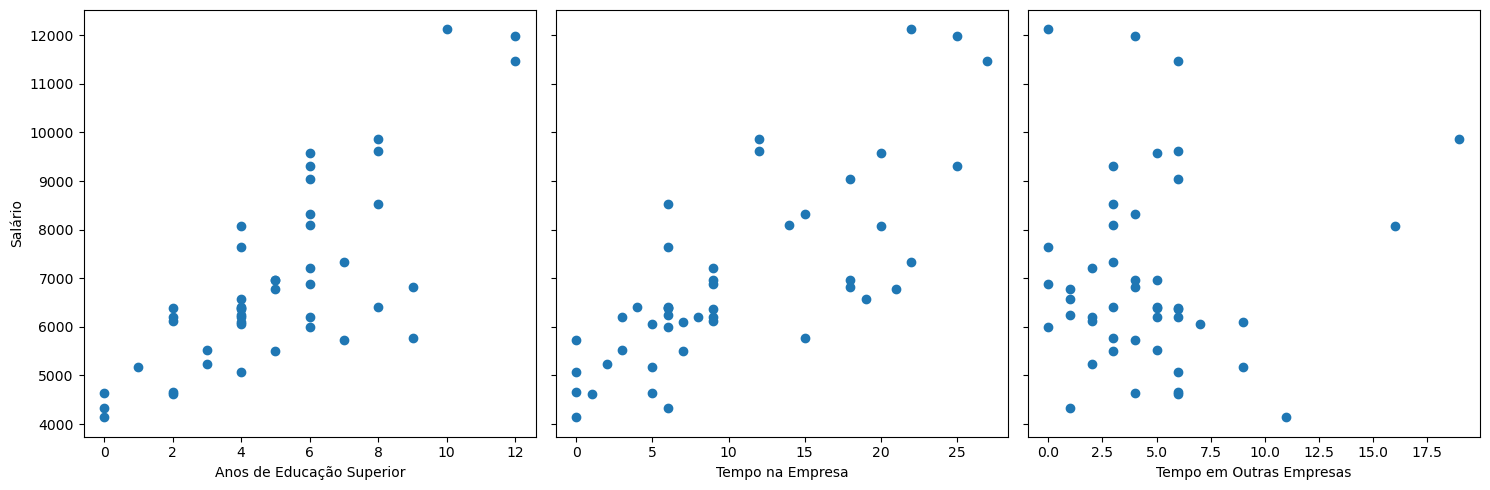

In [21]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharey=True, figsize=(15, 5))

ax1.scatter(df['Anos_Educ_Superior'], df['Salario'])
ax1.set_xlabel('Anos de Educação Superior')
ax1.set_ylabel('Salário')

ax2.scatter(df['Tempo_Empresa'], df['Salario'])
ax2.set_xlabel('Tempo na Empresa')

ax3.scatter(df['Tempo_Outras_Empresas'], df['Salario'])
ax3.set_xlabel('Tempo em Outras Empresas')

plt.tight_layout()
plt.show()

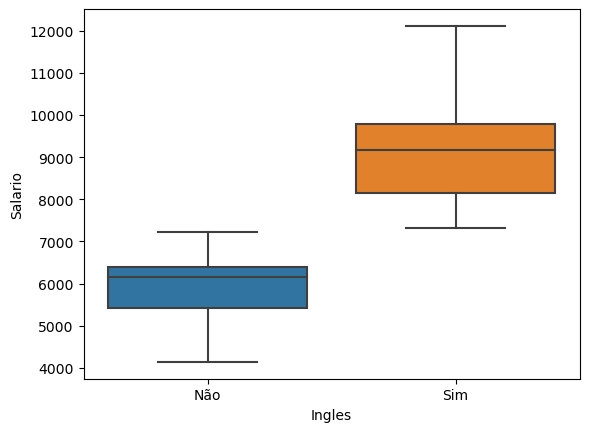

In [22]:
sns.boxplot(x=df['Ingles'], y=df['Salario']);

Como a distribuição entre quem tem e não tem skill de dados é tão diferente, é praticamente certo que essa variável contribuirá para que o modelo explique ainda mais a variabilidade da variável salário, ou seja, aumente o R². **Na prática**: as estimativas realizadas pelo modelo serão ainda melhores.

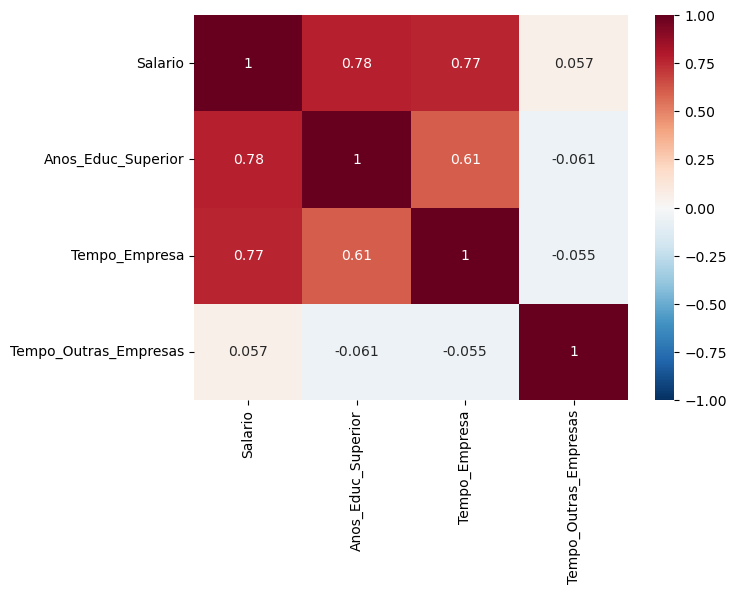

In [24]:
fig = plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True);

## Preparação dos Dados

# Criando variáveis Dummy

In [25]:
df.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles
39,9316.0,6,25,3,Sim
25,6570.9,4,19,1,Não
26,6788.4,5,21,1,Não
44,11974.4,12,25,4,Sim
35,8086.9,6,14,3,Sim


In [26]:
# 1a Forma: Usando get_dummies()
df2 = pd.get_dummies(df, drop_first=True)
df2.sample(5, random_state=42)

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles_Sim
39,9316.0,6,25,3,1
25,6570.9,4,19,1,0
26,6788.4,5,21,1,0
44,11974.4,12,25,4,1
35,8086.9,6,14,3,1


### Ajuste do Modelo de Regressão usando o Statsmodels (Pacote de Modelos Estatísticos)

In [27]:
df2.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa,Tempo_Outras_Empresas,Ingles_Sim
0,4139.5,0,0,11,0
1,4331.1,0,6,1,0
2,4629.1,2,1,6,0
3,4645.9,0,5,4,0
4,4651.2,2,0,6,0


In [29]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Tempo_Outras_Empresas',
         'Ingles_Sim']]

In [30]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     67.72
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.62e-17
Time:                        13:55:16   Log-Likelihood:                -365.98
No. Observations:                  46   AIC:                             742.0
Df Residuals:                      41   BIC:                             751.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercepto             4423.02


Quando uma variável tem um p-valor superior a 5%, significa que ela não é estatisticamente significativa. No nosso caso, Tempo_Outras_Empresas apresentou um p-valor acima desse limite, indicando que não há evidências suficientes para afirmar que ela afeta o salário de forma consistente. Por isso, foi excluída do modelo para focarmos nas variáveis que realmente influenciam o salário.

In [31]:
# Variável resposta
y = df2['Salario']

# Variáveis explicativas
df2['intercepto'] = 1 

x = df2[['intercepto',
         'Anos_Educ_Superior',
         'Tempo_Empresa',
         'Ingles_Sim']]

In [32]:
# Ajusta o modelo e retorna os resultados
modelo = sm.OLS(y , x)
resultado = modelo.fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     92.39
Date:                Sat, 13 Jul 2024   Prob (F-statistic):           1.57e-18
Time:                        13:58:56   Log-Likelihood:                -366.00
No. Observations:                  46   AIC:                             740.0
Df Residuals:                      42   BIC:                             747.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4456.7757    231

## Equação do modelo

Salário = $\beta_0$ + $\beta_1$ x Anos Educação Superior + $\beta_2$ x Tempo Empresa + $\beta_3$ x Possui Skill Dados (Sim)

## Interpretação do Modelo

**Intercepto ou $\beta_0$**: Salário médio de um colaborador sem educação superior, recém chegado na empresa e sem saber falar inglês é de `R$4.456,78`.<br>
**$\beta_1$** x Anos de Educação Superior: Cada ano adicional de educação superior, mantendo tempo de empresa e sabendo falar  inglês, gera um aumento médio de `R$253,58`.<br>
**$\beta_2$** x Tempo de Empresa: Cada ano adicional de tempo de empresa, mantendo os anos de educação superior e sabendo falar  inglês, gera um aumento médio de `R$61,20`.<br>
**$\beta_3$** x Sabe Inglês: Saber falar inglês, mantendo os anos de educação superior e tempo de empresa constantes, gera um aumento médio de `R$1.966,37`.